In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import glob
from tkinter import *

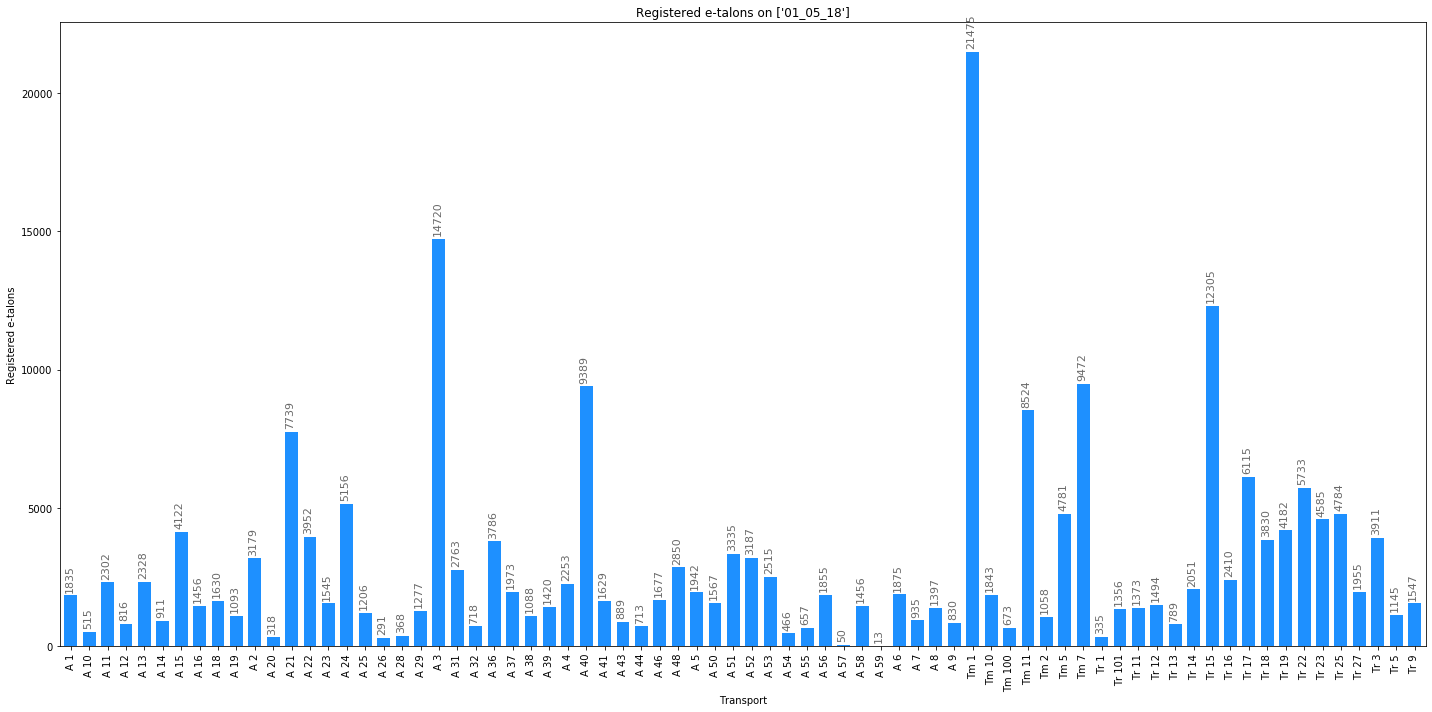

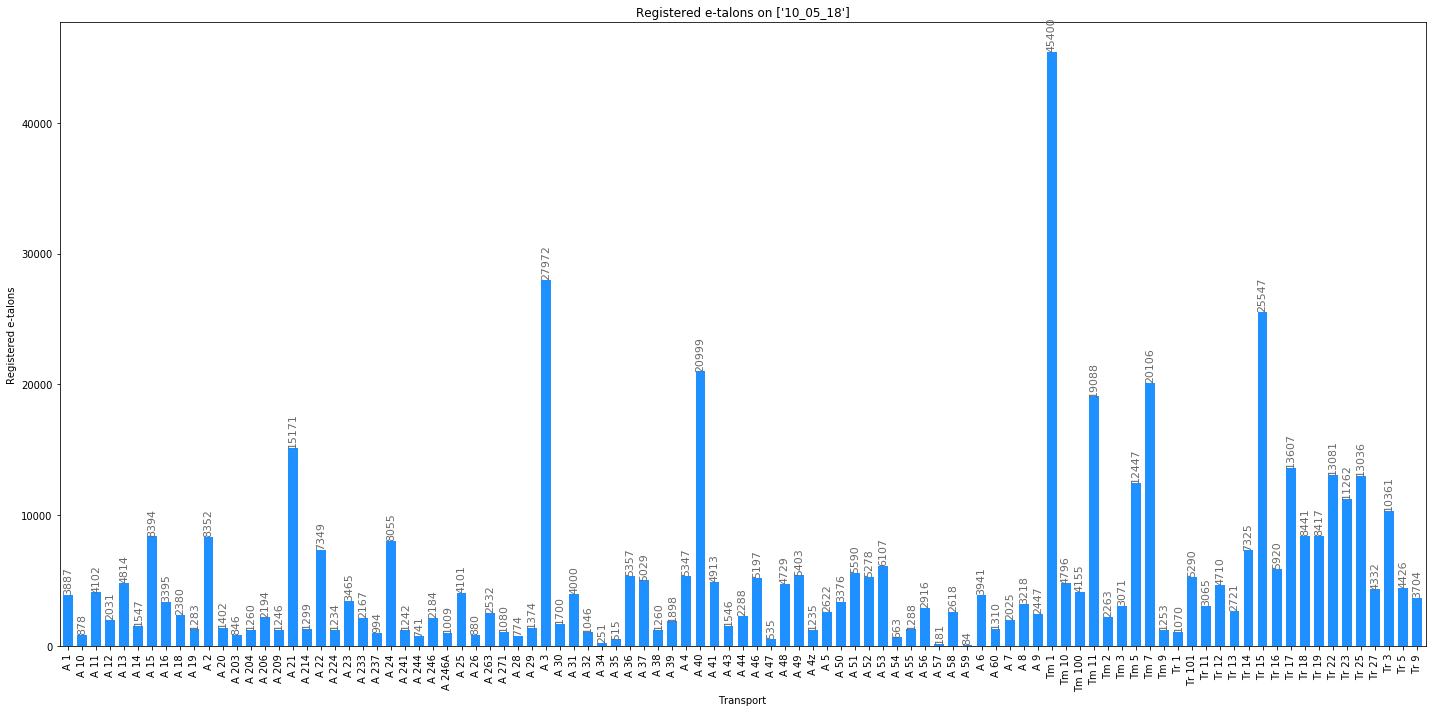

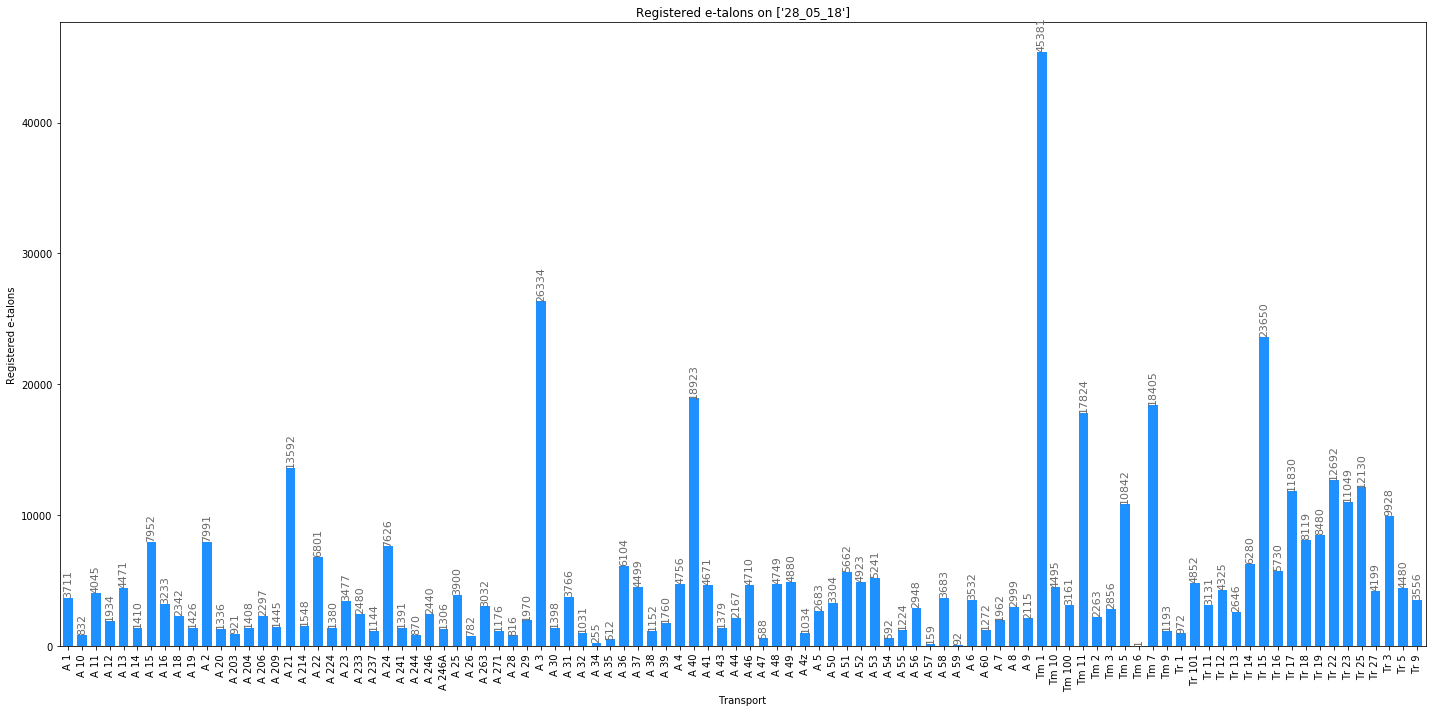

In [6]:
def check(*args):
    data=pd.read_csv(variable.get())
    plt.figure(figsize=(20,10))
    transp = data.pivot_table(index=['TMarsruts'], aggfunc='size')
    ax = transp.plot(kind='bar', color='dodgerblue', width=0.7)
    res = re.findall("(?<=Dati)\w+", variable.get())
    plt.title('Registered e-talons on '+str(res))
    plt.ylabel('Registered e-talons')
    plt.xlabel('Transport')
    plt.tight_layout()
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height()+200, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',rotation=90)
    plt.show()

OPTIONS = glob.glob('ValidDati*.txt')

master = Tk()
master.geometry("200x100")

variable = StringVar(master)
variable.set(OPTIONS[0]) 

w = OptionMenu(master, variable, *OPTIONS)
w.pack()

button = Button(master, text="OK", command=check)
button.pack()

mainloop()

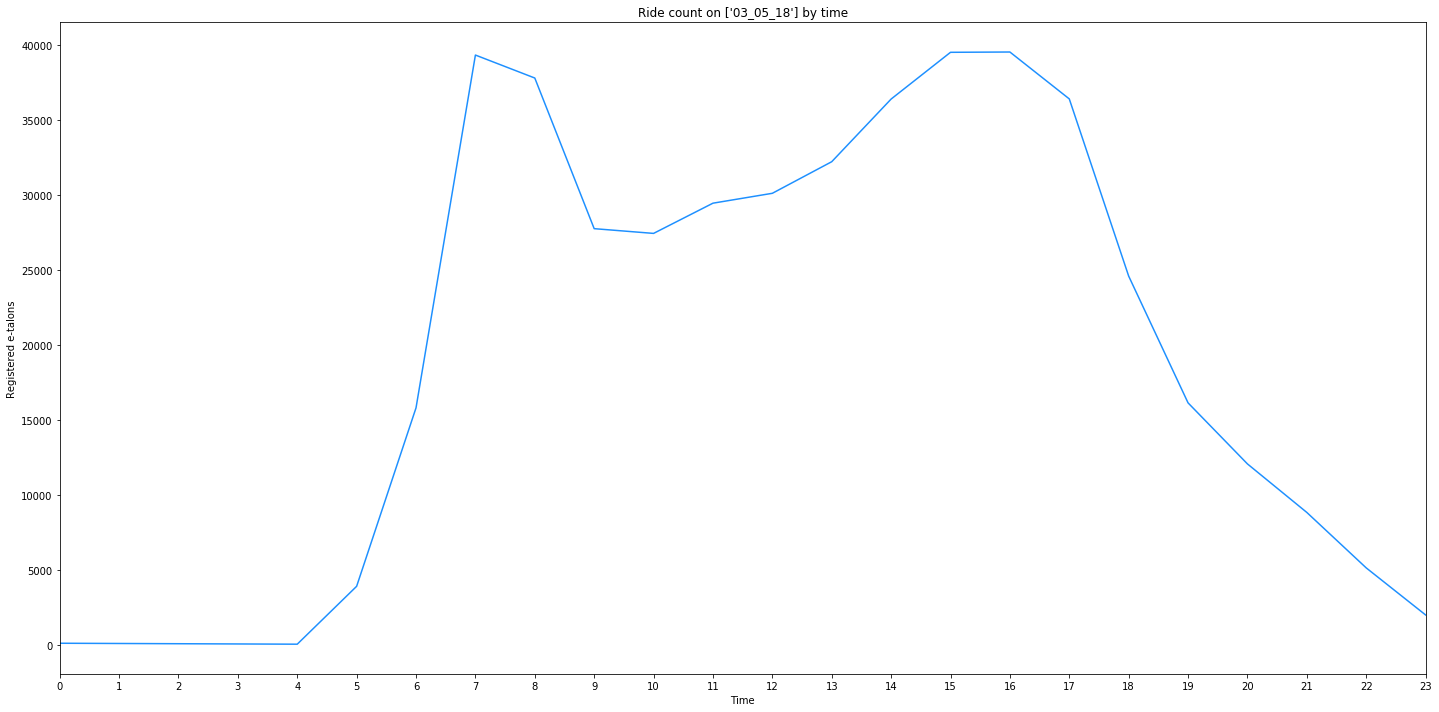

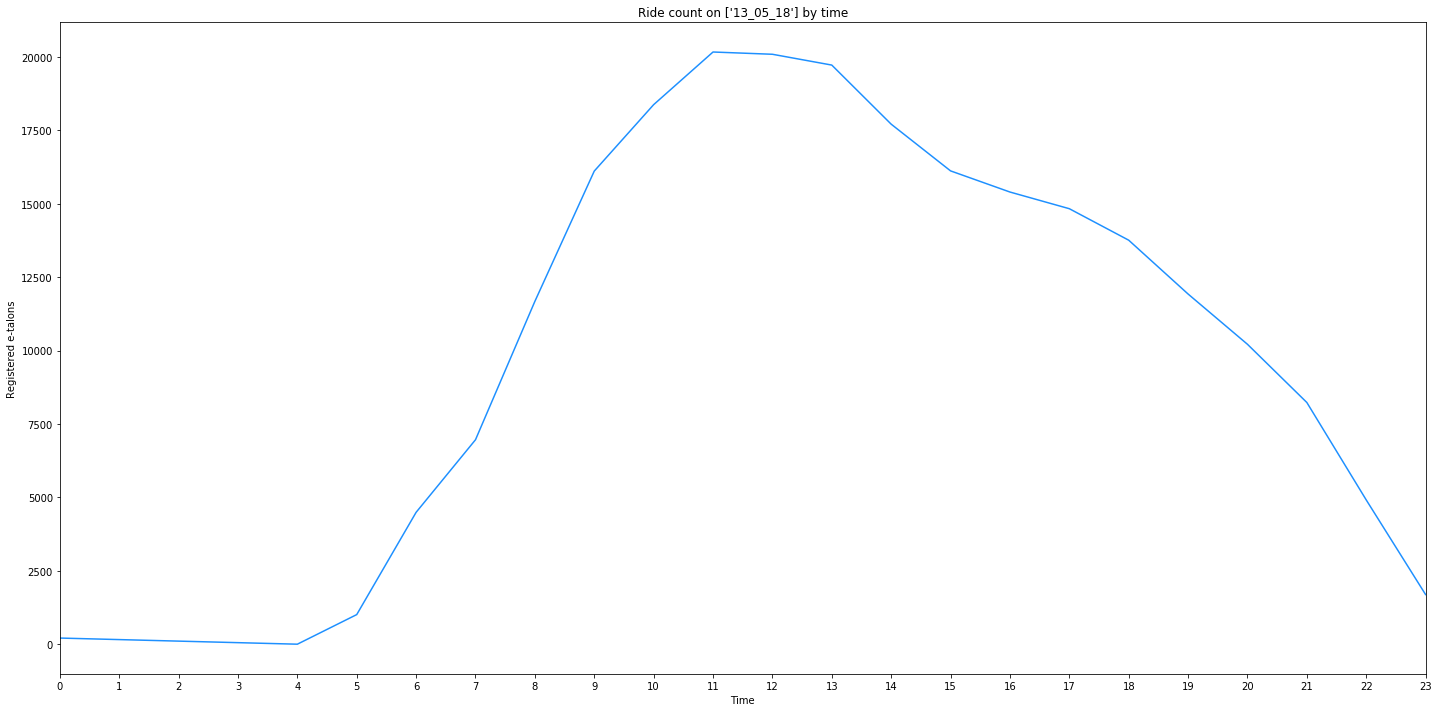

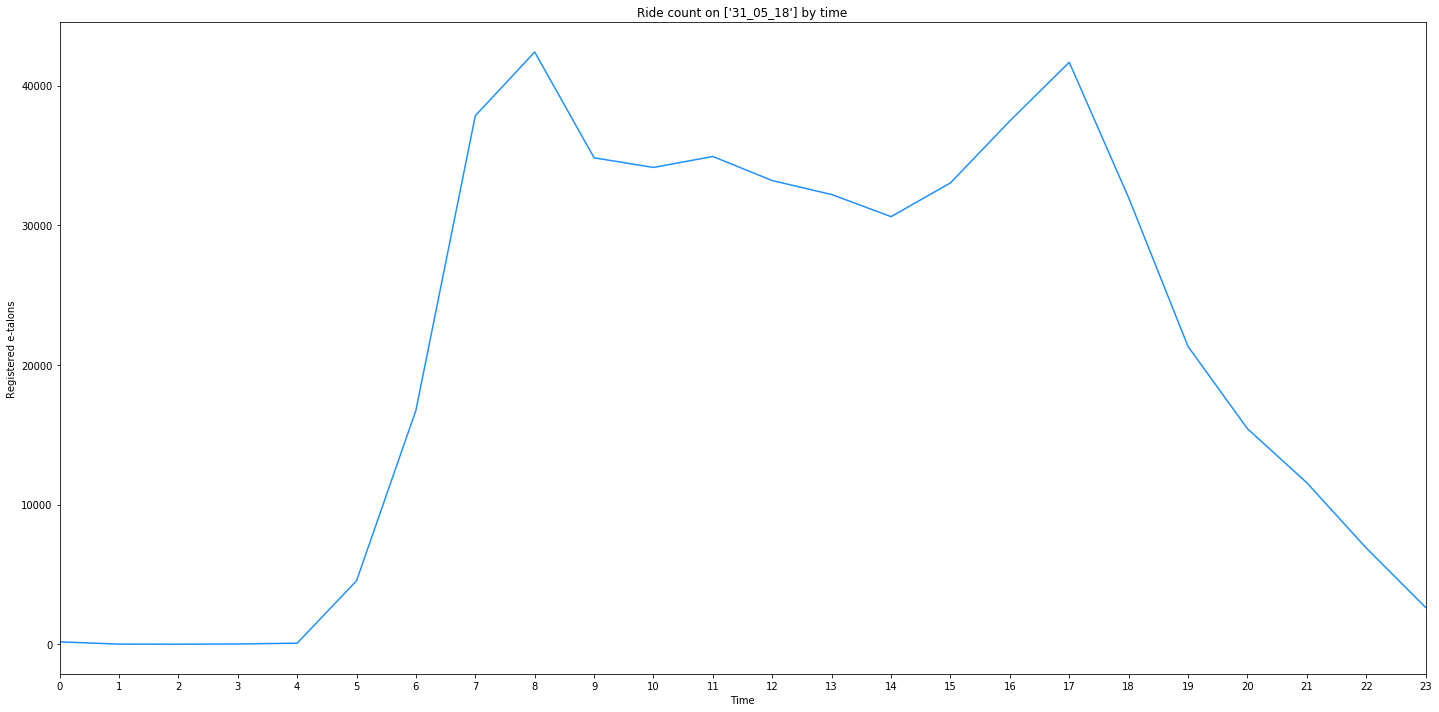

In [11]:
def check(*args):
    data = pd.read_csv(variable.get())
    plt.figure(figsize=(20,10))
    data['Laiks'] = pd.to_datetime(data['Laiks'], dayfirst=True)
    grouped = data.groupby(data.Laiks.dt.hour).size()
    ax=grouped.plot(color='dodgerblue')
    res = re.findall("(?<=Dati)\w+", variable.get())
    plt.title('Ride count on '+str(res)+' by time')
    plt.ylabel('Registered e-talons')
    plt.xlabel('Time')
    plt.tight_layout()
    loc = plticker.MultipleLocator(base=1.0)
    ax.xaxis.set_major_locator(loc)
    plt.show()

OPTIONS = glob.glob('ValidDati*.txt')

master = Tk()
master.geometry("200x100")

variable = StringVar(master)
variable.set(OPTIONS[0]) 

w = OptionMenu(master, variable, *OPTIONS)
w.pack()

button = Button(master, text="OK", command=check)
button.pack()

mainloop()